# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100


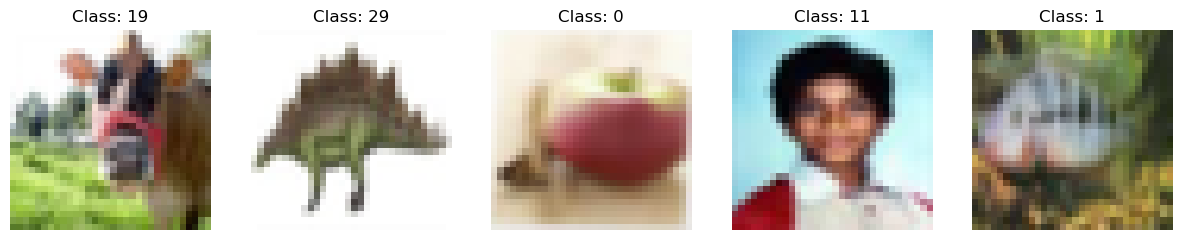

In [2]:
import matplotlib.pyplot as plt
# Your code here
# Explore the shape of the dataset
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Number of classes: {len(set(y_train.flatten()))}")

# Show a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 10))
for i in range(5):
    axes[i].imshow(x_train[i])  # Display image
    axes[i].axis('off')
    axes[i].set_title(f"Class: {y_train[i][0]}")

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
# Normalize the images by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# Verify normalization by checking the min and max pixel values
print(f"Min value in x_train: {x_train.min()}, Max value in x_train: {x_train.max()}")


Min value in x_train: 0.0, Max value in x_train: 1.0


In [4]:
from keras.utils import to_categorical


# convert the labels to One-hot encoded vectors 
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)


In [5]:
from sklearn.model_selection import train_test_split

# split the training data into training and validation sets
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Your code here
# Initialize the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))  # 32 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  # 64 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  # 128 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected (Dense) Layers
model.add(Dense(512, activation='relu'))  # Dense layer with 512 neurons
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(256, activation='relu'))  # Dense layer with 256 neurons
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(100, activation='softmax'))  

model.summary()


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,299,364 (4.96 MB)

 Trainable params: 1,299,364 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______Since CIFAR-100 has 100 classes, categorical crossentropy is the ideal loss function to minimize during training for multi-class classification problems.
- <b>Optimizer:</b> ______Adam is a popular optimizer well-suited for a wide range of tasks, including image classification, as it generally provides faster convergence and works well with sparse gradients.

In [7]:
from keras import optimizers

# Your code here
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
# Your code here
from keras.callbacks import EarlyStopping


# Train the model
history = model.fit(
    x_train_final, y_train_final,  # Training data and labels
    epochs=25,                 # Number of epochs
    batch_size=32,         # Batch size
    validation_data=(x_val, y_val), # Validation data
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],  # Early stopping
    verbose=2  
)




Epoch 1/25
1250/1250 - 24s - 19ms/step - accuracy: 0.0475 - loss: 4.2210 - val_accuracy: 0.0987 - val_loss: 3.8493
Epoch 2/25
1250/1250 - 24s - 19ms/step - accuracy: 0.1107 - loss: 3.7544 - val_accuracy: 0.1691 - val_loss: 3.4487
Epoch 3/25
1250/1250 - 25s - 20ms/step - accuracy: 0.1620 - loss: 3.4597 - val_accuracy: 0.2248 - val_loss: 3.1365
Epoch 4/25
1250/1250 - 24s - 19ms/step - accuracy: 0.2002 - loss: 3.2609 - val_accuracy: 0.2575 - val_loss: 3.0059
Epoch 5/25
1250/1250 - 26s - 21ms/step - accuracy: 0.2338 - loss: 3.0930 - val_accuracy: 0.2845 - val_loss: 2.8794
Epoch 6/25
1250/1250 - 24s - 20ms/step - accuracy: 0.2567 - loss: 2.9595 - val_accuracy: 0.2949 - val_loss: 2.8133
Epoch 7/25
1250/1250 - 26s - 21ms/step - accuracy: 0.2814 - loss: 2.8371 - val_accuracy: 0.3024 - val_loss: 2.7985
Epoch 8/25
1250/1250 - 26s - 20ms/step - accuracy: 0.3022 - loss: 2.7404 - val_accuracy: 0.3251 - val_loss: 2.6756
Epoch 9/25
1250/1250 - 25s - 20ms/step - accuracy: 0.3188 - loss: 2.6518 - val_a

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______ 35.83 %
- <b>Other metric:</b> ______ Precision
- <b>Reason for selection:</b> _____ precision is valuable because CIFAR-100 contains 100 classes, and some of the classes may be visually similar to others. Thus, it's important to evaluate how well the model avoids misclassifying images into incorrect classes (false positives).
- <b>Value of metric:</b> ______ 35.74 %
- <b>Interpretation of metric value:</b> ______ This value indicates that, across all classes, about 36% of the time, the model's predictions for a class are correct. This is relatively low, which suggests that the model may be struggling with many of the classes, and there's likely a high rate of misclassifications (false positives).

In [13]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy and loss on the test set
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3567 - loss: 2.5530
Test Accuracy: 35.83%
Test Loss: 2.5422


In [14]:
from sklearn.metrics import precision_score
import numpy as np

# Predict the class probabilities on the test set
y_pred = model.predict(x_test)

# Convert predictions from probabilities to class labels (argmax)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute Precision (per class and macro average)
precision = precision_score(y_true_classes, y_pred_classes, average=None)  # Precision for each class
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')  # Macro average precision

# Print Precision for each class
print("Precision per class:")
print(precision)

# Print Macro average Precision
print(f"Macro Average Precision: {precision_macro:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Precision per class:
[0.67605634 0.42241379 0.3559322  0.5        0.125      0.21585903
 0.36708861 0.41333333 0.37777778 0.5308642  0.24050633 0.25
 0.33076923 0.239819   0.26415094 0.17647059 0.49333333 0.4351145
 0.304      0.34146341 0.69607843 0.39864865 0.27536232 0.56122449
 0.56435644 0.37735849 0.23404255 0.19259259 0.5        0.46551724
 0.3452381  0.29770992 0.39705882 0.36567164 0.35227273 0.24444444
 0.24822695 0.33606557 0.13513514 0.48648649 0.42307692 0.54237288
 0.248      0.29069767 0.20175439 0.17721519 0.19444444 0.6440678
 0.44047619 0.48113208 0.18       0.29230769 0.42857143 0.4591195
 0.41666667 0.12727273 0.41726619 0.32222222 0.35772358 0.37209302
 0.76666667 0.45299145 0.5        0.26815642 0.08       0.28125
 0.20779221 0.31182796 0.66071429 0.40384615 0.37096774 0.57943925
 0.22727273 0.28368794 0.27777778 0.78666667 0.5210084  0.14150943
 0.16260163 0.31325301 0.16666667 0.27659574 0.71698113 0.31168831
 0.33333333 

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

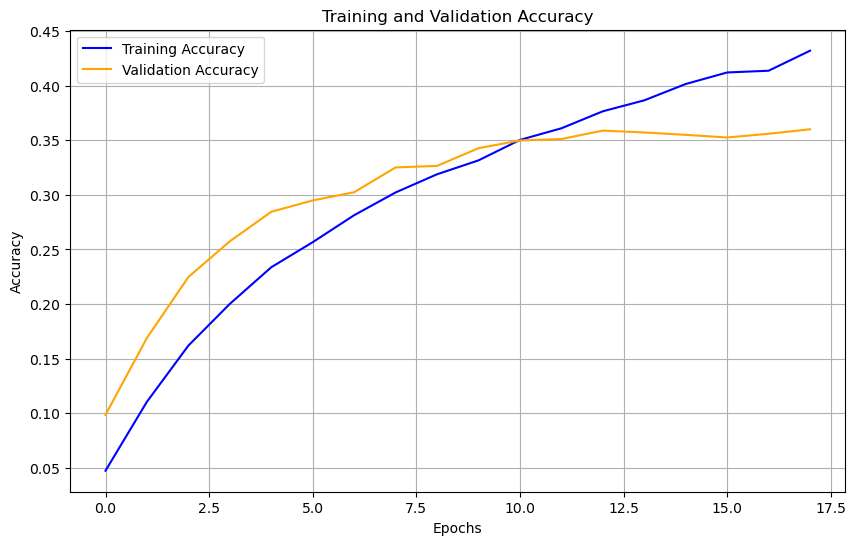

In [15]:
# Your code here
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


If the validation accuracy starts to decline after some epochs while training accuracy keeps increasing, this indicates that the model is overfitting and might benefit from techniques like early stopping, regularization, or more data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


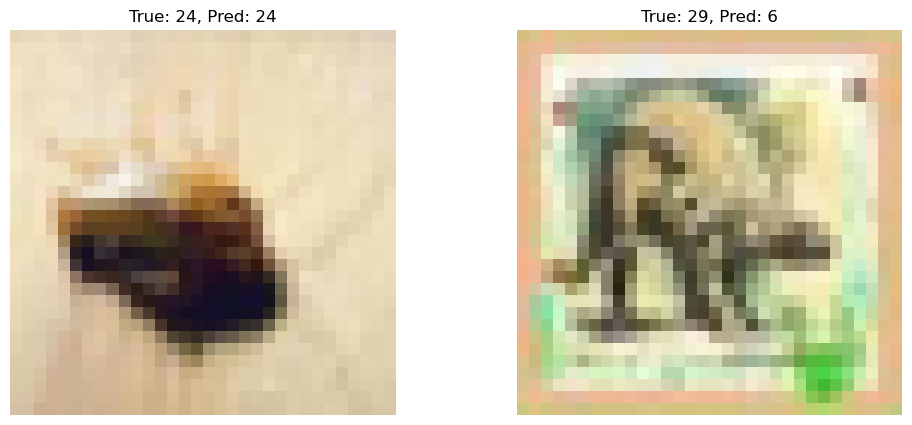

Correctly classified image probabilities: [[9.46208747e-05 7.53761651e-06 6.88873406e-05 3.47667257e-04
  2.12818314e-03 1.32918501e-06 3.72485793e-03 1.11210823e-01
  2.91445819e-08 4.62579919e-05 1.16720516e-03 1.77003812e-06
  4.00731315e-09 1.02435145e-07 1.24554010e-02 1.97524540e-04
  2.27567052e-05 3.82166121e-09 1.38568471e-03 4.19526550e-05
  3.78325603e-05 6.23772451e-07 7.90467493e-06 3.12135540e-10
  6.83528900e-01 1.98675170e-05 2.65886448e-03 2.57981137e-05
  3.20520758e-06 2.28213277e-04 1.06962787e-07 1.21671320e-07
  1.64226000e-03 1.79828663e-09 9.67626256e-05 3.63734489e-06
  8.51474942e-06 1.50271173e-08 2.40480003e-05 1.98758926e-07
  1.20557643e-05 6.22357416e-04 2.70323337e-08 1.13976944e-06
  3.93605995e-04 5.86065289e-04 2.69406740e-07 1.57825434e-05
  2.69241218e-06 2.18991647e-09 5.76602388e-03 2.02580077e-06
  4.30114149e-08 4.15453724e-06 4.23917800e-06 2.53546378e-03
  3.64951489e-07 2.19414802e-03 9.04520391e-07 1.77485308e-05
  2.62834621e-09 6.92515641e

In [17]:

# Randomly select an image index from the test set
correct_idx = np.argmax(y_test, axis=1) == np.argmax(model.predict(x_test), axis=1)
incorrect_idx = np.argmax(y_test, axis=1) != np.argmax(model.predict(x_test), axis=1)

# Correctly classified image
correct_image_idx = np.random.choice(np.where(correct_idx)[0])
correct_image = x_test[correct_image_idx]
correct_label = y_test[correct_image_idx]
correct_pred = model.predict(np.expand_dims(correct_image, axis=0))
correct_pred_label = np.argmax(correct_pred)

# Incorrectly classified image
incorrect_image_idx = np.random.choice(np.where(incorrect_idx)[0])
incorrect_image = x_test[incorrect_image_idx]
incorrect_label = y_test[incorrect_image_idx]
incorrect_pred = model.predict(np.expand_dims(incorrect_image, axis=0))
incorrect_pred_label = np.argmax(incorrect_pred)

# Plotting the correctly classified image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"True: {np.argmax(correct_label)}, Pred: {correct_pred_label}")
plt.axis('off')

# Plotting the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"True: {np.argmax(incorrect_label)}, Pred: {incorrect_pred_label}")
plt.axis('off')

plt.show()

# Print model probabilities for both images
print(f"Correctly classified image probabilities: {correct_pred}")
print(f"Incorrectly classified image probabilities: {incorrect_pred}")


Classification probabilities indicate the model's confidence in its predictions. High confidence in correct predictions is ideal, while low confidence (for both correct and incorrect predictions) may suggest the need for model improvement (e.g., more training or better architecture).

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

To improbe the model's Performance, i will use Batch Normalization and SGD optimizer with learning rate 0.01.

### Batch Normalization
Batch Normalization helps to normalize the inputs of each layer, making the training more stable and faster. It reduces the internal covariate shift by ensuring that the input to each layer has a stable distribution of activations.


In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, SGD

# Your code here
# Initialize the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation=None, input_shape=(32, 32, 3), padding='same'))  # 32 filters, 3x3 kernel
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))    # Activation function after Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation=None, padding='same'))  # 64 filters, 3x3 kernel
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))    # Activation function after Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation=None, padding='same'))  # 128 filters, 3x3 kernel
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))    # Activation function after Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected (Dense) Layers
model.add(Dense(512, activation='relu'))  # Dense layer with 512 neurons
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(256, activation='relu'))  # Dense layer with 256 neurons
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(100, activation='softmax'))  

model.summary()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,300,260 (4.96 MB)

 Trainable params: 1,299,812 (4.96 MB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=SGD(learning_rate=0.01, momentum = 0.9), loss='categorical_crossentropy', metrics=['accuracy'])

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [49]:

# Train the model
history = model.fit(
    x_train_final, y_train_final,  # Training data and labels
    epochs=25,                    # Number of epochs
    batch_size=32,                # Batch size
    validation_data=(x_val, y_val),  # Validation data
    callbacks=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),   # Early stopping callback
    verbose=2  # Show progress bar
)

Epoch 1/25
1250/1250 - 28s - 22ms/step - accuracy: 0.0322 - loss: 4.4144 - val_accuracy: 0.0202 - val_loss: 4.8897
Epoch 2/25
1250/1250 - 27s - 21ms/step - accuracy: 0.0524 - loss: 4.1667 - val_accuracy: 0.0818 - val_loss: 3.9279
Epoch 3/25
1250/1250 - 26s - 21ms/step - accuracy: 0.0753 - loss: 3.9898 - val_accuracy: 0.1230 - val_loss: 3.7356
Epoch 4/25
1250/1250 - 27s - 22ms/step - accuracy: 0.1057 - loss: 3.7762 - val_accuracy: 0.1626 - val_loss: 3.4615
Epoch 5/25
1250/1250 - 28s - 22ms/step - accuracy: 0.1404 - loss: 3.5681 - val_accuracy: 0.1697 - val_loss: 3.4611
Epoch 6/25
1250/1250 - 28s - 22ms/step - accuracy: 0.1757 - loss: 3.3592 - val_accuracy: 0.2209 - val_loss: 3.1582
Epoch 7/25
1250/1250 - 28s - 22ms/step - accuracy: 0.2122 - loss: 3.1639 - val_accuracy: 0.2538 - val_loss: 2.9486
Epoch 8/25
1250/1250 - 27s - 22ms/step - accuracy: 0.2416 - loss: 2.9974 - val_accuracy: 0.2862 - val_loss: 2.8350
Epoch 9/25
1250/1250 - 29s - 23ms/step - accuracy: 0.2734 - loss: 2.8468 - val_a

In [50]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4208 - loss: 2.2017
Test Accuracy: 0.4226
Test Loss: 2.2044


In [51]:
from sklearn.metrics import precision_score
import numpy as np

# Predict the class probabilities on the test set
y_pred = model.predict(x_test)

# Convert predictions from probabilities to class labels (argmax)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute Precision (per class and macro average)
precision = precision_score(y_true_classes, y_pred_classes, average=None)  # Precision for each class
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')  # Macro average precision

# Print Precision for each class
print("Precision per class:")
print(precision)

# Print Macro average Precision
print(f"Macro Average Precision: {precision_macro:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision per class:
[0.77659574 0.44274809 0.22167488 0.234375   0.16455696 0.32743363
 0.51724138 0.43410853 0.47413793 0.70666667 0.22155689 0.3253012
 0.41346154 0.38028169 0.43835616 0.53571429 0.39230769 0.68181818
 0.47945205 0.56818182 0.77777778 0.525      0.5483871  0.56779661
 0.73239437 0.5        0.36842105 0.19117647 0.45508982 0.55932203
 0.3255814  0.44827586 0.40350877 0.51648352 0.56451613 0.
 0.49333333 0.52173913 0.46153846 0.65151515 0.50909091 0.71276596
 0.30612245 0.50793651 0.24137931 0.21142857 0.26315789 0.46527778
 0.51445087 0.61333333 0.29787234 0.61904762 0.52066116 0.65486726
 0.53571429 0.13846154 0.47333333 0.61627907 0.54736842 0.27906977
 0.67213115 0.37790698 0.5212766  0.32258065 0.3125     0.17204301
 0.30275229 0.19072165 0.71304348 0.6039604  0.37931034 0.74626866
 0.13253012 0.31386861 0.3        0.72164948 0.71428571 0.39393939
 0.22666667 0.3852459  0.12135922 0.29460581 0.64347826 0.29365079
 0.473684

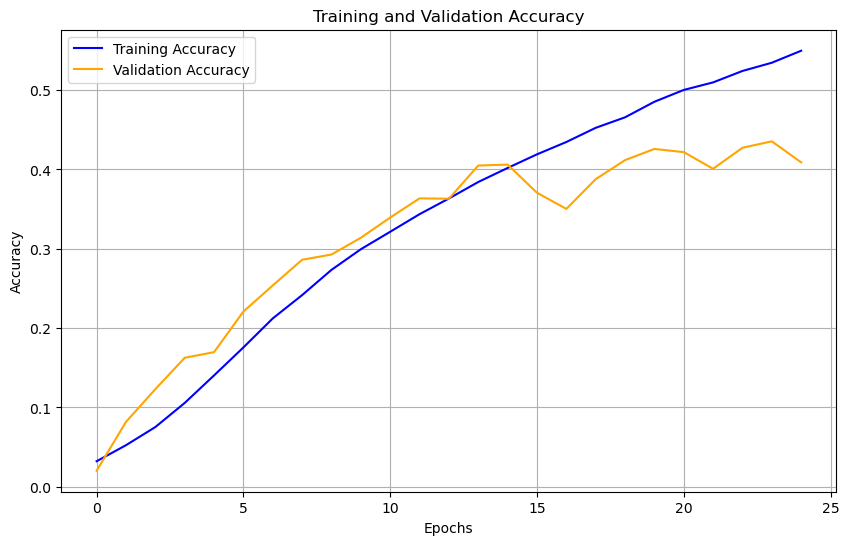

In [52]:
# Your code here
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


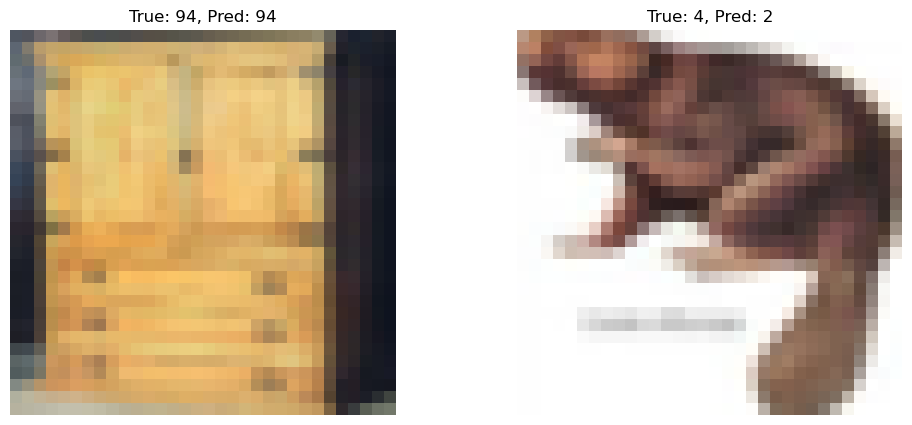

Correctly classified image probabilities: [[4.05979226e-05 1.65488582e-05 2.53635772e-05 2.58922846e-05
  1.03595066e-05 1.05190448e-01 5.56248835e-07 8.65602658e-07
  1.43502871e-06 3.66939115e-04 1.49271323e-03 1.45661897e-05
  1.60144613e-04 1.83797383e-05 1.27131159e-06 1.02785118e-04
  1.07201585e-03 4.29390457e-05 3.48679896e-06 7.65362871e-04
  2.63056643e-02 8.07748464e-08 2.72329547e-03 5.65738046e-05
  3.69788449e-06 1.75471216e-01 3.29537324e-05 4.97266547e-06
  1.24412228e-03 6.71899397e-06 4.77204232e-08 5.03985102e-05
  1.12803045e-05 6.80036144e-04 6.32684169e-05 7.49317769e-06
  8.23634386e-04 2.73063706e-05 1.27514375e-06 6.88769098e-04
  6.81626901e-04 5.22505559e-07 9.63339044e-05 1.19556418e-04
  2.11357328e-05 1.32860105e-05 7.78599042e-06 2.81458033e-05
  3.82602039e-08 6.28454245e-07 5.64449510e-05 2.20643760e-05
  2.89687648e-07 1.45555037e-04 1.16988315e-06 4.85160808e-06
  1.90178852e-07 9.18369260e-05 1.64809671e-06 2.66466628e-07
  1.04791688e-04 1.55398171e

In [56]:
# Randomly select an image index from the test set
correct_idx = np.argmax(y_test, axis=1) == np.argmax(model.predict(x_test), axis=1)
incorrect_idx = np.argmax(y_test, axis=1) != np.argmax(model.predict(x_test), axis=1)

# Correctly classified image
correct_image_idx = np.random.choice(np.where(correct_idx)[0])
correct_image = x_test[correct_image_idx]
correct_label = y_test[correct_image_idx]
correct_pred = model.predict(np.expand_dims(correct_image, axis=0))
correct_pred_label = np.argmax(correct_pred)

# Incorrectly classified image
incorrect_image_idx = np.random.choice(np.where(incorrect_idx)[0])
incorrect_image = x_test[incorrect_image_idx]
incorrect_label = y_test[incorrect_image_idx]
incorrect_pred = model.predict(np.expand_dims(incorrect_image, axis=0))
incorrect_pred_label = np.argmax(incorrect_pred)

# Plotting the correctly classified image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"True: {np.argmax(correct_label)}, Pred: {correct_pred_label}")
plt.axis('off')

# Plotting the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"True: {np.argmax(incorrect_label)}, Pred: {incorrect_pred_label}")
plt.axis('off')
plt.show()

# Print model probabilities for both images
print(f"Correctly classified image probabilities: {correct_pred}")
print(f"Incorrectly classified image probabilities: {incorrect_pred}")


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance improved significantly after switching to SGD with a learning rate of 0.01, achieving 54.97% training accuracy and 40.90% validation accuracy at the end of 25 epochs, compared to the initial results with Adam. This improvement likely stems from SGD's more controlled updates, which can help avoid the pitfalls of getting stuck in sharp minima, providing a smoother path to generalization. The learning rate of 0.01 seems to have helped the model converge more effectively without overshooting.

However, there is still room for improvement. While the model shows progress, the validation accuracy suggests that it could benefit from further regularization (e.g., Dropout or Batch Normalization) to prevent overfitting and better generalize to unseen data. Additionally, experimenting with learning rate schedules or momentum in SGD could accelerate convergence and improve performance.

These are few other techniques we can try:

Learning Rate Scheduler:  To dynamically adjust the learning rate during training.
Data Augmentation:    To artificially increase the size of the training dataset, improving generalization.
Transfer Learning:   using pre-trained models like VGG16 or ResNet for better feature extraction.
These methods could help push the model towards higher accuracy and better generalization.





## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.